# Assignment 2

<font color=blue>Name : Neha Patil <br>
ID : 801081006</font>

# Feature Construction:

In order to classify gender of a profile, textual content of the tweet posted by the user is the most important feature. To apply machine learning on text, text content needs to be turned into numerical feature vectors. This process is termed as 'Feature Extraction'. <br>
The features derived from the textual content include **N-grams** combined with **TF-IDF**. The simplest approach for feature extraction is using bag of words. Bag of words divides the textual content into individual word count statistics. N-grams can be viewed as an extension to Bag of words which captures more content around each word. Human language has some structure and N-grams help to capture this structure so that the model can store more context with a well-understood space-time tradeoff. As the assigned task here is to classify the gender of user and not to predict the next word, having n-grams rather than unigrams and bigrams will be more helpful. Occurence count of these words acts as the other feature. Longer documents will have higher average count values than shorter documents to avoid such discrepancies, divide the count by total number of words in the document which is done by TF i.e, Term Frequency. Further refinement is to downscale weights for words that occur in many documents in the corpus and thus are less informative which is done by IDF i.e, Inverse Document Frequency. Hence, the second feature TD-IDF.

# Description of the Classifier:

I have chosen the Naive Bayes classifier. More specifically I used the multinomial version of this.<br>
In our dataset it is very reasonable to assume conditional independence between every pair of features given the value of the class variable. That is, if we know that the class variable is male (or female), each of the feature is nearly independent of others. This will be justified in the preprocessing step. Moreover there is no class overlap in our task. As a result this classifier is a natural choice over some of the other classifiers for our dataset.Additionally, Multinomial Naive Bayes classifier takes linear running time which makes it more desirable for our task.<br>
Since we have a text classification task at hand where the data are typically represented as word vector counts or TF-IDF vectors, the Multinomial Naive Bayes classifier is appropriate here.<br>
Also as our dataset is not too large the high bias/low variance MultinomialNaive Bayes classifier has an advantage over low bias/high variance classifiers like k-nearest neighbor, since the latter might overfit. 

# Evaluation technique:

In order to evaluate my classifier, I considered **Accuracy**, **Precision**, **Recall**, **F1-score** as my evaluation metrics. <br>
For our dataset we can think of relabeling males as '0' and females as '1'.

The accuracy is the ratio of the number of correct classification and the total number of samples. The higher the accuracy, the better the classifier is.

For our dataset true positives is correct classification of females, false positives is classification of males as females, false negative is classification of females as males.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive. 

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-1 score of 1 is the best and F1-score of 0 is the worst.

Normally the dataset is split into training data and the testing data. And usually the split of the data between training and testing is done randomly. But it is possible that this random split is not random and a particular feature is the same for one subset of our dataset. This will result in overfitting. K-fold Cross-validation is similar to spliting data into training and tesing but it is applied to more subsets. K-fold Cross-validation also helps us to assess how our model will perform on an indepedent unseen dataset. We also want a less biased estimate of the model and the technique of k-fold Cross-validation is therefore appropriate here.

# Implementation: 

## a) Data Preprocessing:

In this step, I dropped the irrelevant features of our dataset such as - 'last_judgment_at','tweet_coord','tweet_location','user_timezone' using the **drop** function of the **pandas** library. In the next step the rows with missing values of 'gender' or 'description' are removed using the **notnull** function of the pandas library. Then the missing entries of 'gender_gold' and 'profile_yn_gold' are filled by the string 'unknown' using **fillna** function of the pandas library. Then I use the **OneHotEncoder** function of the **preprocessing** module of **sklearn** library to encode each of the texual features in consideration. 

Next I plot the heatmap of the correlation matrix of the features using the **corr** function from pandas library and **heatmap** function from the **seaborn** library. From this heatmap we can see that our near independence assumption seems to be correct as most of entires are quite small. Based on this correlation matrix, I drop the features whose correlation with 'gender' is negligible.

Next I used the **CountVectorizer** module of the **sklearn.feature_extraction.text** package for preprocessing the tweet text. Preprocessing consists of tokenization and stopword removal techniques.

In [103]:
import pandas as pd
import random
import string
data =pd.read_csv('./gender_classifier.csv', encoding='latin-1')
#print (data.head())
fdata = data.drop(['profileimage','_last_judgment_at','tweet_coord','tweet_location','user_timezone'], axis=1)
fdata = fdata[pd.notnull(fdata['gender'])]
fdata = fdata[pd.notnull(fdata['description'])]
#print (fdata.columns)

In [104]:
fdata["gender_gold"].fillna("unknown", inplace = True)
fdata["profile_yn_gold"].fillna("unknown", inplace = True)

In [105]:
fdata.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
gender_gold              0
link_color               0
name                     0
profile_yn_gold          0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
tweet_id                 0
dtype: int64

In [106]:
from sklearn import preprocessing
golden=fdata["_golden"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
golden = golden.reshape(len(golden),1)
golden_encoded = onehot_encoder.fit_transform(golden)
fdata['_golden']=golden_encoded

from sklearn import preprocessing
unitstate=fdata["_unit_state"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
unitstate = unitstate.reshape(len(unitstate),1)
unitstate_encoded = onehot_encoder.fit_transform(unitstate)
unitstate_encoded.shape
fdata['_unit_state']=unitstate_encoded

from sklearn import preprocessing
gender_confidence=fdata["gender:confidence"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
gender_confidence = gender_confidence.reshape(len(gender_confidence),1)
gender_confidence_encoded = onehot_encoder.fit_transform(gender_confidence)
gender_confidence_encoded.shape
fdata['gender:confidence']=gender_confidence_encoded

from sklearn import preprocessing
gender=fdata["gender"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
gender = gender.reshape(len(gender),1)
gender_encoded = onehot_encoder.fit_transform(gender)
gender_encoded.shape
fdata['gender']=gender_encoded

from sklearn import preprocessing
profile_yn=fdata["profile_yn"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
profile_yn = profile_yn.reshape(len(profile_yn),1)
profile_yn_encoded = onehot_encoder.fit_transform(profile_yn)
profile_yn_encoded.shape
fdata['profile_yn']=profile_yn_encoded

from sklearn import preprocessing
created=fdata["created"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
created = created.reshape(len(created),1)
created_encoded = onehot_encoder.fit_transform(created)
created_encoded.shape
fdata['created']=created_encoded

from sklearn import preprocessing
link_color=fdata["link_color"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
link_color = link_color.reshape(len(link_color),1)
link_color_encoded = onehot_encoder.fit_transform(link_color)
link_color_encoded.shape
fdata['link_color']=link_color_encoded

from sklearn import preprocessing
name=fdata["name"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
name = link_color.reshape(len(name),1)
name_encoded = onehot_encoder.fit_transform(name)
name_encoded.shape
fdata['name']=name_encoded

from sklearn import preprocessing
gender_gold=fdata["gender_gold"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
gender_gold = gender_gold.reshape(len(gender_gold),1)
gender_gold_encoded = onehot_encoder.fit_transform(gender_gold)
gender_gold_encoded.shape
fdata['gender_gold']=gender_gold_encoded

from sklearn import preprocessing
profile_yn_gold=fdata["profile_yn_gold"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
profile_yn_gold = profile_yn_gold.reshape(len(profile_yn_gold),1)
profile_yn_gold_encoded = onehot_encoder.fit_transform(profile_yn_gold)
profile_yn_gold_encoded.shape
fdata['profile_yn_gold']=profile_yn_gold_encoded

from sklearn import preprocessing
sidebar_color=fdata["sidebar_color"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
sidebar_color = sidebar_color.reshape(len(sidebar_color),1)
sidebar_color_encoded = onehot_encoder.fit_transform(sidebar_color)
sidebar_color_encoded.shape
fdata['sidebar_color']=sidebar_color_encoded

from sklearn import preprocessing
tweet_created=fdata["tweet_created"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
tweet_created = tweet_created.reshape(len(tweet_created),1)
tweet_created_encoded = onehot_encoder.fit_transform(tweet_created)
tweet_created_encoded.shape
fdata['tweet_created']=tweet_created_encoded

C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

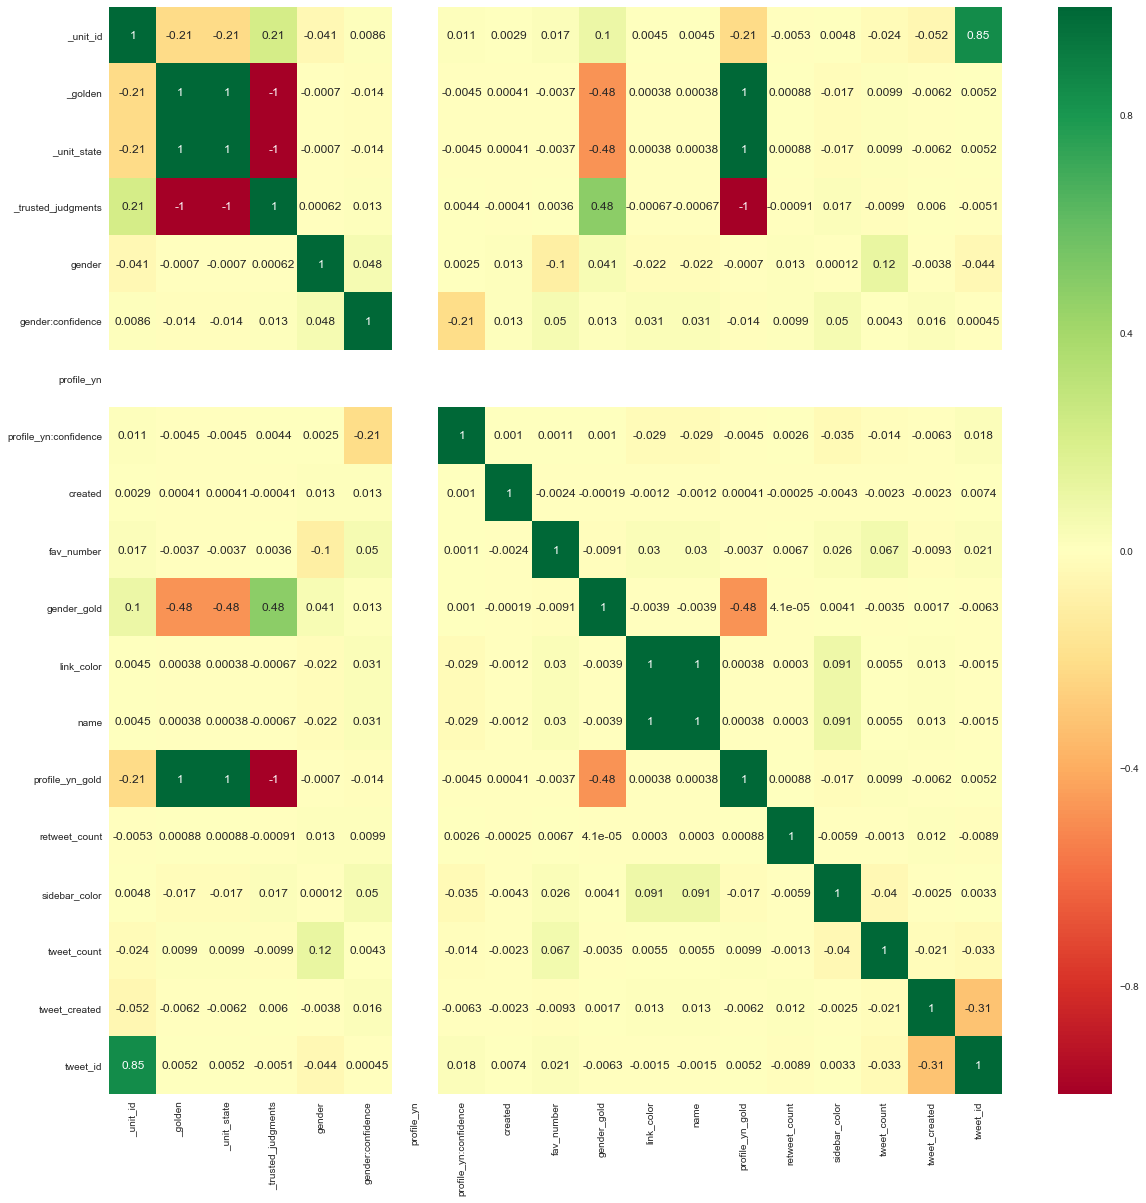

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = fdata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(fdata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Based on the preprocessing, I assign values to X and Y were X consists of independent features from given dataset and Y contains labels assigned to the users.

In [108]:
Y = fdata.iloc[:,5].values
#print (Y)

X = fdata.drop(['gender','_golden','_unit_state','_trusted_judgments','profile_yn','profile_yn:confidence','profile_yn_gold','tweet_created','sidebar_color','description','text'], axis=1)
X.columns
X.shape

(16224, 10)

For the feature extraction from the tweet's textual content and to build a classifier with only these features, I split the text and label datasets into train and test datasets.

In [109]:
from sklearn.model_selection import train_test_split
text_train, text_test, Y_train, Y_test = train_test_split(fdata.text, Y, test_size=0.2)
print (text_train.shape, Y_train.shape)
print (text_test.shape, Y_test.shape)

(12979,) (12979,)
(3245,) (3245,)


## b) Extraction of Feature:

The **CountVectorizer** module of the **sklearn.feature_extraction.text** package used for preprocessing also extracts the **N-grams** from the text content of our data. I used the **fit_transform** function along with the object of CountVectorizer on the training text data and the **transform** function along with the object of CountVectorizer on the testing text data.

I further used the **TfidfTransformer** module of the **sklearn.feature_extraction.text** package for extracting TF-IDF of the N-gram features extracted using **CountVectorizer**. **TfidfTransformer** also performs normalization on the features which is important as it neutralizes the effect of different scales across features. I used the **fit_transform** function along with the object of TfidfTransformer on the training text data and the **transform** function along with the object of TfidfTransformer on the testing text data. 

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Text_train_counts = count_vect.fit_transform(text_train)
Text_test_counts = count_vect.transform(text_test)
Text_train_counts.shape

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
Text_train = tfidf_transformer.fit_transform(Text_train_counts)
Text_test = tfidf_transformer.transform(Text_test_counts)
Text_train.shape
 

(12979, 32851)

## c) Classifier:

I used the **MultinomialNB** module from the **sklearn.naive_bayes** package. The inputs to the **fit** function of this module were the training features and the training labels and the output of this function is the our model/classifier. The predict function of the package is then used to predict the labels of the testing dataset using our model/classifier were transformed text of the test dataset is the input.

The accuracy of model which takes only textual features is also displayed below:

In [111]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
textmodel = MultinomialNB().fit(Text_train, Y_train)
predicted = textmodel.predict(Text_test)
print(accuracy_score(Y_test,predicted))

0.7214175654853621


**Classification_report** module from **sklearn.metrics** is used to generate a report consisting of precision, recall and f1-score for the model built above.

In [112]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print (report)

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84      2334
         1.0       0.77      0.01      0.02       911

   micro avg       0.72      0.72      0.72      3245
   macro avg       0.75      0.50      0.43      3245
weighted avg       0.73      0.72      0.61      3245



### A new classifier model is bulit below which takes extracted textual features along with the features in X i.e the one present in gender_classifier.csv to predict the target labels:

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(12979, 10) (12979,)
(3245, 10) (3245,)


In [114]:
import scipy
X_train = scipy.sparse.csr_matrix(X_train.values)
X_test = scipy.sparse.csr_matrix(X_test.values)

In [115]:
X_train = scipy.sparse.hstack([X_train , Text_train ]).A
X_test = scipy.sparse.hstack([X_test , Text_test]).A

The accuracy of model which takes textual features and some features from gender_classifier.csv is also displayed below:

In [116]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
model = MultinomialNB().fit(X_train, Y_train)
predicted_values = model.predict(X_test)
#print ('Score:', model.score(X_test, Y_test))
print(accuracy_score(Y_test,predicted_values))

0.6718027734976888


Classification_report module from sklearn.metrics is used to generate a report consisting of precision, recall and f1-score for the model built above.

In [117]:
report = classification_report(Y_test, predicted_values)
print (report)

              precision    recall  f1-score   support

         0.0       0.73      0.87      0.79      2347
         1.0       0.32      0.16      0.22       898

   micro avg       0.67      0.67      0.67      3245
   macro avg       0.52      0.51      0.50      3245
weighted avg       0.62      0.67      0.63      3245



## d) K-Fold cross validation:

In K-Folds Cross Validation we split our data into k different subsets. Here I choose **k = 5**. Usually, the data is split as 80 percent for training and 20 percent for testing and since our dataset is not too large the choice of k is reasonable. Therefore we split our data into 5 subsets - A,B,C,D,E. 

I used the **cross_val_score** function from the **sklearn.model_selection** module for partitioning the dataset and for evaluating scores by cross-validation. The inputs to this function are our model/classifier (used to fit the data), the features extracted from the textual content of our dataset (the data to fit), the target variable, and the cross-validation splitting. The resulting output is the accuracy scores for each of the 5 iterations.

The cross-validation data partitioning I used is explained below:

We will leave out A as test subset and use B,C,D,E to train our data in the first iteration. Now in the first step we will leave out B as the validation set and use C,D,E to train our data and then test it on B. In the second step we will leave out C as the validation set and use B,D,E to train our data and then test it on C. In the third step we will leave out D as the validation set and use B,C,E to train our data and then test it on D. In the fourth step we will leave out E as the validation set and use B,C,D to train our data and then test it on E. Now we will average our model using the above four steps and then test it on A. This will give us the test accuracy in the first iteration of cross-validation.

Then we will leave out B as test subset and use A,C,D,E to train our data in the second iteration. Proceeding as above we will get the test accuracy in the second iteration of cross-validation.

Then we will leave out C as test subset and use A,B,D,E to train our data in the third iteration. Proceeding as above we will get the test accuracy in the third iteration of cross-validation.

Then we will leave out D as test subset and use A,B,C,E to train our data in the fourth iteration. Proceeding as above we will get the test accuracy in the fourth iteration of cross-validation.

Then we will leave out E as test subset and use A,B,C,D to train our data in the fifth iteration. Proceeding as above we will get the test accuracy in the fifth iteration of cross-validation.

In [118]:
Fulltext_counts = count_vect.transform(fdata.text)
Fulltext = tfidf_transformer.transform(Fulltext_counts)

In [119]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
scores = cross_val_score(textmodel, Fulltext, Y, cv=5)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.72973806 0.72973806 0.73004622 0.73220339 0.73304562]


The actual training and testing subsets in each of the k-iterations are printed below:

In [120]:
kf = KFold(n_splits=5)
for train, test in kf.split(Fulltext):
    print("%s %s" % (train, test))

[ 3245  3246  3247 ... 16221 16222 16223] [   0    1    2 ... 3242 3243 3244]
[    0     1     2 ... 16221 16222 16223] [3245 3246 3247 ... 6487 6488 6489]
[    0     1     2 ... 16221 16222 16223] [6490 6491 6492 ... 9732 9733 9734]
[    0     1     2 ... 16221 16222 16223] [ 9735  9736  9737 ... 12977 12978 12979]
[    0     1     2 ... 12977 12978 12979] [12980 12981 12982 ... 16221 16222 16223]


## e) Performance of Evaluation metrics:

In order to evaluate the desired metrics, I used the **sklearn.metrics** module of the **sklearn** library. From the sklearn.metrics module, I used the **make_scorer** function to make a scorer of the performance metric and I used **accuracy_score**, **precision_score**, **recall_score**, **f1_score** functions for Accuracy, Precision, Recall, F1-score respectively.

To evaluate the performance metric for each of the k iterations of cross-validation, I used the **sklearn.model_selection.cross_validate** function of the sklearn library. The inputs to this function are our model/classifier (used to fit the data), the features extracted from the textual content of our dataset (the data to fit), the target variable, the scoring string (to evaluate the predictions) and the cross-validation splitting. The function returned all the desired evaluation metrics for each iteration of cross-validation. I further used the **pprint** library to print the different evaluation metrics on different lines. Because we have k = 5, each of performance metric array is of size 5 and the i<sup>th</sup> entry of the array corresponds to the i<sup>th</sup> iteration of cross-validation.

To get the final accuracy score after choosing the best fold from the k-folds, I used the **cross_val_predict** function of the **sklearn.model_selection** package.

In [121]:
from sklearn.model_selection import cross_val_predict
final = cross_val_predict(textmodel, Fulltext, Y, cv=5)
print(accuracy_score(Y,final))

0.7309541420118343


# Analysis of results:

In [122]:
from sklearn.model_selection import cross_val_predict
final = cross_val_predict(textmodel, Fulltext, Y, cv=5)
print(accuracy_score(Y,final))

0.7309541420118343


In [123]:
import pprint
import sklearn
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = sklearn.model_selection.cross_validate(textmodel, Fulltext, Y, cv=5, scoring=scoring)

pprint.pprint(scores)

{'fit_time': array([0.00700736, 0.00800967, 0.00502872, 0.00597787, 0.00595331]),
 'score_time': array([0.00499105, 0.00701475, 0.00498724, 0.00398827, 0.00505352]),
 'test_accuracy': array([0.72973806, 0.72973806, 0.73004622, 0.73220339, 0.73304562]),
 'test_f1_score': array([0.0045403 , 0.        , 0.01573034, 0.02469136, 0.02257336]),
 'test_precision': array([0.4       , 0.        , 0.5       , 0.73333333, 0.90909091]),
 'test_recall': array([0.00228311, 0.        , 0.00799087, 0.01255708, 0.01142857]),
 'train_accuracy': array([0.74058094, 0.7418137 , 0.7434317 , 0.74266122, 0.74137134]),
 'train_f1_score': array([0.08130969, 0.08915466, 0.1       , 0.09680909, 0.08303742]),
 'train_precision': array([0.91975309, 0.93181818, 0.93908629, 0.91794872, 0.96815287]),
 'train_recall': array([0.04253497, 0.04681701, 0.05281188, 0.05109906, 0.043379  ])}


I used the **CVScores** visualizer of the **yellowbrick.model_selection** package to visualize the performance of cross validation accuracy for every fold.

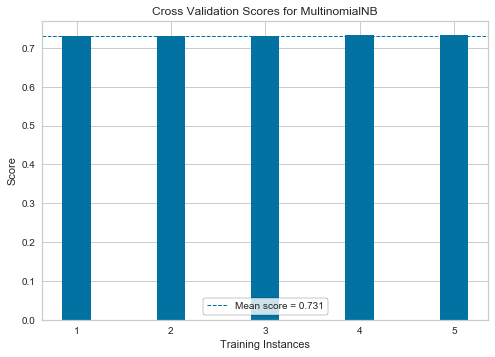

In [124]:
from yellowbrick.model_selection import CVScores
visualizer = CVScores(textmodel, cv=5)
visualizer.fit(Fulltext,Y)
visualizer.poof()

### Weighted average performance for above labels:
The average performances of each of the above metric over all the cross-validation iterations are as follows:-

In [125]:
Avg_Scores = {}
for k,v in scores.items():
    Avg_Scores[k] = sum(v)/ float(len(v))
pprint.pprint (Avg_Scores)

{'fit_time': 0.006395387649536133,
 'score_time': 0.005206966400146484,
 'test_accuracy': 0.7309542709166525,
 'test_f1_score': 0.013507070730735407,
 'test_precision': 0.5084848484848485,
 'test_recall': 0.006851924331376385,
 'train_accuracy': 0.7419717794692885,
 'train_f1_score': 0.09006217105516116,
 'train_precision': 0.935351829368987,
 'train_recall': 0.04732838258661525}


# Applying classifier to conversational data:

## Dataset1:

In [126]:
import pandas as pd
from nltk.corpus import names

data1 = pd.read_csv('2009_04_28.txt', sep='(' , names =["gender","text"])
data2 = pd.read_csv('2009_04_28.txt', sep=':' , names =["names","time1","time2","text"])
male_names = names.words('male.txt')
male_names = [x.lower()+' ' for x in male_names]

label = 0
for entry in data1.gender:
    if entry in male_names:
        data1['gender'][label] = 'male'
    else:
        data1['gender'][label] = 'female'
    label = label + 1
#data1['gender']

In [128]:
from sklearn import preprocessing
Gender=data1["gender"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
Gender = Gender.reshape(len(Gender),1)
Gender_encoded = onehot_encoder.fit_transform(Gender)
Gender_encoded.shape
data1['gender'] = Gender_encoded

C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [129]:
Dataset1_test_counts = count_vect.transform(data2.text)
Dataset1_test = tfidf_transformer.transform(Dataset1_test_counts)

In [130]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
textmodel = MultinomialNB().fit(Text_train, Y_train)
predicted = textmodel.predict(Dataset1_test)
print(accuracy_score(data1.gender,predicted))

0.7018348623853211


In [131]:
report = classification_report(data1.gender, predicted)
print (report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       460
         1.0       0.00      0.00      0.00       194

   micro avg       0.70      0.70      0.70       654
   macro avg       0.35      0.50      0.41       654
weighted avg       0.49      0.70      0.58       654



## Dataset2:

In [132]:
import pandas as pd
from nltk.corpus import names

data3 = pd.read_csv('2009_05_05.txt', sep='(' , names =["gen","chat"])
data4 = pd.read_csv('2009_05_05.txt', sep=':' , names =["gen","time1","time2","chat"])

male_names = names.words('male.txt')
male_names = [x.lower()+' ' for x in male_names]

tag = 0
for entry in data3.gen:
    if entry in male_names:
        data3['gen'][tag] = 'male'
    else:
        data3['gen'][tag] = 'female'
    tag = tag + 1

#data3['gen']

In [134]:
from sklearn import preprocessing
Gen=data3["gen"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
Gen = Gen.reshape(len(Gen),1)
Gen_encoded = onehot_encoder.fit_transform(Gen)
Gen_encoded.shape
data3['gen'] = Gen_encoded

C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [135]:
Dataset2_test_counts = count_vect.transform(data4.chat)
Dataset2_test = tfidf_transformer.transform(Dataset2_test_counts)

In [136]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
textmodel = MultinomialNB().fit(Text_train, Y_train)
predicted2 = textmodel.predict(Dataset2_test)
print(accuracy_score(data3.gen,predicted2))

0.5633802816901409


In [137]:
report2 = classification_report(data3.gen, predicted2)
print (report2)

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72       520
         1.0       0.00      0.00      0.00       403

   micro avg       0.56      0.56      0.56       923
   macro avg       0.28      0.50      0.36       923
weighted avg       0.32      0.56      0.41       923



C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neha1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
